# Лабораторная работа № 4 <a id='intro'></a>

- [Предварительная обработка](#1)
- [Выявление целевого признака](#2)
- [Разбиение данных](#3)
- [Разработка моделей](#4)
    - [Метод k-ближайших соседей](#4_1)
    - [Логистическая регрессия](#4_2)
    - [Случайный лес](#4_3)
- [Дополнительное задание](#dop)
- [Выводы](#5)


## Предварительная обработка данных <a id='1'></a>

Проведём осмотр данных на предмет ошибок.

В начале выполнения данной лабораторной работы необходимо перед основными действиями обработать данные от *пропусков*, *явных* и *неявных* *дубликатов* и *привести столбцы* к правильным типам данных. Для проведения каждого из данных действий в библиотеке **Pandas** существуют отдельные функции.

Для начала, необходимо импортировать библиотеку **Pandas** в Python и загрузить в датафрейм из CSV-файла:

In [2]:
import pandas as pd

read_csv = pd.read_csv('4heart2.csv', sep=',')
data = pd.DataFrame(read_csv)

Также, при помощи импорта библиотеки "`warnings`" уберём все предупреждения, которые точно появятся при дальнейшей работе.

In [3]:
import warnings

warnings.filterwarnings('ignore')

Далее, выведем первые **20** строк в получившейся таблице, чтобы оценить качество данных на предмет необходимости *обработки от пропусков*:

In [4]:
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Исходя из первых 20 строк данного датасета, можно сделать вывод о том, что необходимо изменить тип данных одного столбца, а именно - "`age`". Также, необходимо изменить название столбца "`DEATH_EVENT`" и привести к виду, в котором все символы имеют нижний регистр, а пробелы между словами заполняются символом нижнего подчеркивания.

Изменение *типа данных* столбца происходит при помощи функции "`.astype()`", которая вызывается для столбца. В качестве параметров в данный метод передаётся тип данных, на который необходимо изменить столбец.      
Изменение *названия* столбца происходит при помощи метода "`.rename()`", которая используется для всего датафрейма. И в качестве параметров передаются названия столбцов, которые необходимо изменить.      

Проверка изменения проводиться при помощи метода "`.info()`":

In [5]:
data['age'] = data['age'].astype(int)
data = data.rename(columns={'DEATH_EVENT': 'death_event'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


Далее, проверим исходный датасет на наличие **пропусков**, или же *пустых значений*. Данное действие производиться при помощи специального метода `.isna()`, который ищет все пропуски в таблице. А вместе с ним используют метод `.sum()`, который просуммирует и выведет количество пустых значений в таблице.

In [6]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Из вышеприведённого окна видно, что в исходном датасете проверка на пропуски показала их *полное отсутствие*, что очень хорошо.

Далее, следующим этапом при предварительной обработке данных является **поиск дубликатов**.

Поиск дубликатов обычно делиться на 2 типа: *поиск явных дубликатов* и *поиск неявных дубликатов*. Начнем с первого случая.

Для поиска явных дубликатов используется функция "`.duplicated()`", которая просто ищет дубликаты. По умолчанию данный метод признает дубликатами те строки, которые полностью повторяют уже встречавшиеся в датасете. 
Т.е. метод, как и в случае с методом "`.isna()`", выводит значения либо **True**, либо **False**. Поэтому для понимания количества дубликатов добавляют, как и в предыдущем случая, функцию "`.sum()`".

In [7]:
data.duplicated().sum()

0

Получается, что **полностью повторяющихся строк в данном датасете нету**, что хорошо.

Теперь займемся поиском неявных дубликатов. Для этого используют метод "`.unique()`" для каждого столбца датасета. И чтобы вручную не писать этот метод для каждого столбца, гораздо проще будет создать цикл, который будет проходить по массиву, созданному по всем названиям столбцов.

In [8]:
col = data.columns
for column in col:
    print(data[column].unique())

[75 55 65 50 90 60 80 62 45 49 82 87 70 48 68 53 95 58 94 85 69 72 51 57
 42 41 67 79 59 44 63 86 66 43 46 61 81 52 64 40 73 77 78 54 47 56]
[0 1]
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
 

В ходе поиска неявных дубликатов обычно ищут:
- альтернативные варианты написания одного и того же значения;
- ошибочные написания.

И как видно из выводимого сообщения выше, в данном датасете **отсутствуют неявные дубликаты**.

И подводя итог, можно сделать вывод о том, что **в данном датасете нету никаких дубликатов**, ни явных, ни неявных.

И наконец, завершающим этапом проведём стандартизацию величин, находящихся в данном датафрейме, за исключением целевого столбца (т.е. кроме столбца `death_event`). Это становиться возможно сделать при помощи класса `StandartScaler` из библиотеки `Scikit-learn`. Ниже, показан процесс стандартизации данных:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(data.drop('death_event', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns= data.drop('death_event', axis=1).columns)

scaled_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.193302,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.490896,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.351203,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.911945,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.351203,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098573,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.490896,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.332995,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.332995,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


Таким образом, подводя итог данной части лабораторной работы, можно сделать вывод о том, что *предварительная обработка данных прошла успешно*. Значит, можно приступать к остальным этапам лабораторной работы.

[Вернуться в начало](#intro)

## Поиск целевого признака <a id='2'></a>

Выявим, что будет являться целевым признаком.

В данной части выполнения лабораторной работы необходимо выяснить, какой из столбцов в исходном датасете является целевым признаком.

Поскольку исходный датасет содержит записи о болезнях сердца, то логично будет предположить, что целевой признак как-то будет связан с результатом болезни сердца, а их всего может быть 2: либо пациент поправился, либо погиб. И если посмотреть на столбцы набора данных, держа в голове предыдущую информацию, следует, что целевым столбцов в исходном датасете является `death_event`, который показывает как раз именно то, что и было предсказано, а именно умер пациент или нет.

Имея ввиду полученные результаты, следует учитывать данный столбец и пытаться избегать его использование в последующих действиях.

[Вернуться в начало](#intro)

## Разбиение данных <a id='3'></a>

Разобъем данные на два датасета.

Теперь, после завершения всех предварительных действий, можно приступить к разделению датасета на обучающие и тестовые данные. Для этого все в той же библиотеки `scikit-learn` необходимо импортировать класс `train_test_split` из модуля `model_selection`.

In [10]:
from sklearn.model_selection import train_test_split

Затем, необходимо указать значения `X` и `Y`, которые будут переданы в функцию `train_test_split()`. В данном случае значение `x` представляет из себя датафрейм `scaled_data`, который хранит в себе стандартизованные данные всей исходной таблицы. Значение `y` хранит в себе значения из столбца `'death_event'` исходного датасета. Другими словами, `y` хранит в себе значение ключевого столбца исходного набора данных

In [11]:
x = scaled_data     # Стандартизованные данные для обучения и тестирования
y = data['death_event']     # Список результатов для обучения и тестирования

И наконец, необходимо запустить функцию `train_test_split()`, передав в данную функцию в качестве параметров переменные `x` и `y`, а также параметр `test_size`, значение которого влияет на объем тестовой выборки относительно всей. В данном случае объем тестовой выборке равняется **трети** от всего датасета.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

[Вернуться в начало](#intro)

# Разработка моделей <a id='4'></a>

Разработать предсказательную модель качественного отклика несколькими методами

## Метод k-ближайших соседей <a id='4_1'></a>

Логика, лежащая в основе данного алгоритма, является одним из самых простых алгоритмов машинного обучения. Этот алгоритм просто вычисляет расстояние от новой точки данных до всех других обучающих точек. Затем, он выбирает k-ближайших точек данных, где K может быть любым целым числом. И наконец, он присваивает точку классу, к которому принадлежит большинство из K точек данных.

### Импортирование и создание модели

Для начала работы с данной моделью, её необходимо импортировать в данный проект. Данный процесс показан ниже:

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Затем, необходимо создать экземпляр класса `KNeighborsClassifier` и обозвать его переменной **model**. Также, в качестве параметра при создании класса необходимо передать параметр `n_neighbors`, который равен выбранному значению количества кластеров алгоритма K-ближайших соседей. Для начала, пусть данный параметр будет равен **2**.

In [14]:
model = KNeighborsClassifier(n_neighbors=2)

### Обучение модели

И наконец, можно приступить к **обучению данной модели** на тренировочных данных. Для этого используется метод `.fit()`, который применяется к созданной переменной **model**.

In [15]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Прогнозирование с помощью модели

Способ получения прогнозов на основе алгоритма К-ближайших соседей очень простой. Достаточно просто вызвать метод `.predict()`, передав в него переменную **x_test**

In [16]:
predictions = model.predict(x_test)

### Оценка точности

Для оценки точности спрогнозированных значений используются несколько метрик, а именно:

1) **Доля правильных ответов** (*accuracy*)
2) **Точность** (*precision*)
3) **Полнота** (*recall*)
4) **F1-мера** (*F1-score*)
5) **Матрица ошибок** (*confusion matrix*)

*Доля правильных ответов* показывает процент верно угаданных ответов из всех прогнозов. Логично предположить, что чем ближе это значение к 100% (или к 1 если судить по выводимому числу), тем лучше.           
*Точность* говорит о том, какая доля прогнозов относительно **1 класса** верна. То есть рассматривает долю правильных ответов только среди целевого класса. Как и в предыдущем случае, чем метрика ближе к единице, тем лучше.      
*Полнота* показывает, сколько реальных объектов **1 класса** модель смогла обнаружить. Чем ближе данная метрика к единице, тем лучше.               
Так как *Точность* и *Полнота* направлены на избежание противоположных рисков, то нужна сводная метрика, учитывающая баланс между данными метриками. Это и есть *F1-мера*.

Все 4 данных метрики присутствуют в модуле `metrics` библиотеки `sklearn`. Вывод всех четырёх параметров показан ниже:

In [17]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'Accuracy = {acc}, Precision = {precision}, Recall = {recall}, F1-Score = {f1}')

Accuracy = 0.7070707070707071, Precision = 0.7142857142857143, Recall = 0.15625, F1-Score = 0.25641025641025644


Также, в этом же модуле есть класс `classification_report`, вызвав который в выходом сообщении получится точно те же метрики, только уже для всех возможных классов. Ниже представлен данный отчет о классификации: 

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        67
           1       0.71      0.16      0.26        32

    accuracy                           0.71        99
   macro avg       0.71      0.56      0.54        99
weighted avg       0.71      0.71      0.64        99



Также, необходимо построить **матрицу ошибок** (или *матрицу неточностей*). Данная матрица состоит из четырёх значений:
- **True Positive** (истинно положительные): прогноз модели = 1, реальное значение = 1;
- **False Positive** (ложно положительные): прогноз модели = 1, реальное значение = 0;
- **False Negative** (ложно отрицательные): прогноз модели = 0, реальное значение = 1;
- **True Negative** (истинно отрицательные): прогноз модели = 0, реальное значение = 0;

Данная матрица присутствует в модуле `metrics` все той же библиотеки `Scikit-learn`. Ниже показано импортирование данного класса и вывод значений матрицы неточностей:

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
Tn, Fp, Fn, Tp = cm.ravel()
print(cm)
print(f'Tn = {Tn}', f'Fp = {Fp}', f'Fn = {Fn}', f'Tp = {Tp}', sep='\n')

[[65  2]
 [27  5]]
Tn = 65
Fp = 2
Fn = 27
Tp = 5


У хорошей модели большая часть прогнозов должна попадать в группы `Tp` и `Tn`. Из выводимых значений видно, что **72** прогноза из 99 попали в данные две группы. Следовательно, созданную модель можно назвать хорошей.

И заключительным этапом в оценивании модели является создание **ROC-кривой**. Данный график рассчитывается на долях *истинно положительных* и *ложно положительных* результатов. Вид данного графика представлен ниже:

0.6949626865671641


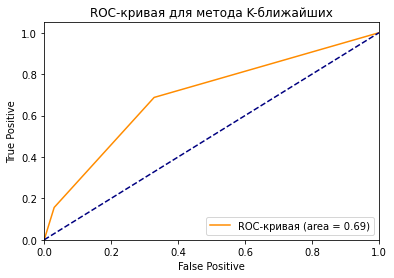

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Предсказания на основе x_test
probs = model.predict_proba(x_test)

# Расчет ROC AUC, ROC-кривой
fpr, tpr, treshold= roc_curve(y_test, probs[:,1])
prob_auc = roc_auc_score(y_test, probs[:,1])
auc_pr = auc(fpr, tpr)
print(prob_auc)

# Вывод графика
plt.plot(fpr, tpr, color='darkorange', label='ROC-кривая (area = %0.2f)' % auc_pr)
plt.plot([0,1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC-кривая для метода K-ближайших')
plt.legend(loc='lower right')
plt.show()

### Оптимальное количество кластеров

И наконец, в качестве заключительного этапа в процессе работы с данным методом, рассчитаем оптимальное количество кластеров для данного алгоритма, используя метод локтя.

Метод локтя включает в себя итерацию по различным значениям `k` и выбор значения с наименьшей частотой ошибок при применении к тестовым данным.

Перед началом работы создадим пустой список `error_rate`, в который будут добавляться частоты ошибок при различных значениях `k`.

In [21]:
error_rate = []

Затем, создадим цикл, который перебирает различные значения `k`. На каждой итерации данного цикла выполняются следующие действия:

- Создается новый экземпляр класса `KNeighborsClassifier` из библиотеки `sklearn`;
- Тренируется модель на тренировочных (или обучающих) данных;
- Делаются прогнозы на основе тестовых данных;
- Вычисляется доля неверных предсказаний (чем ниже, тем лучше).

После выполнения данного цикла данные из массива `error_rate` визуализируются при помощи библиотеки `matplotlib`.

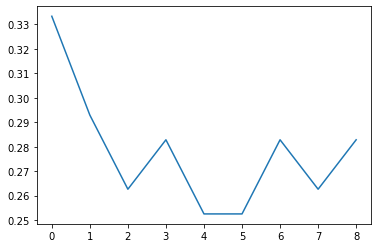

In [22]:
import numpy as np
error_rate.clear()
for i in range(1, 10):
    new_model = KNeighborsClassifier(n_neighbors=i)
    new_model.fit(x_train, y_train)
    new_predictions = new_model.predict(x_test)
    error_rate.append(np.mean(new_predictions != y_test))

plt.plot(error_rate)

Как видно из получившегося графика, минимальная частота ошибок достигается при двух значениях: либо К = **4**, либо К = **6**. 

### Создание модели при наименьшей частоте ошибок

Попробуем построить модель при количестве кластеров равным **4** и оценить получившиеся результаты. Полученные результаты показаны ниже:

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        67
           1       0.75      0.19      0.30        32

    accuracy                           0.72        99
   macro avg       0.73      0.58      0.56        99
weighted avg       0.73      0.72      0.65        99

Матрица ошибок
[[65  2]
 [27  5]]

ROC AUC =  0.7672574626865671


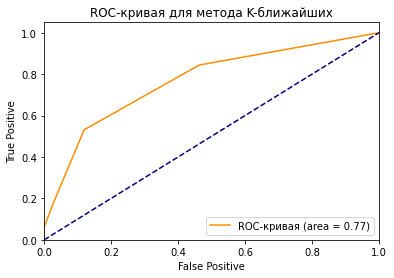

In [44]:
model_optimal = KNeighborsClassifier(n_neighbors=4)
model_optimal.fit(x_train, y_train)
predictions_optimal = model_optimal.predict(x_test)

print(classification_report(y_test, predictions_optimal))

cm = confusion_matrix(y_test, predictions)
print("Матрица ошибок")
print(cm)
print()

# Предсказания на основе x_test
probs = model_optimal.predict_proba(x_test)

# Расчет ROC AUC, ROC-кривой
fpr_k_near, tpr_k_near, treshold= roc_curve(y_test, probs[:,1])
prob_auc = roc_auc_score(y_test, probs[:,1])
auc_pr_k_near = auc(fpr_k_near, tpr_k_near)
print('ROC AUC = ', prob_auc)

# Вывод графика
plt.plot(fpr_k_near, tpr_k_near, color='darkorange', label='ROC-кривая (area = %0.2f)' % auc_pr_k_near)
plt.plot([0,1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC-кривая для метода K-ближайших')
plt.legend(loc='lower right')
plt.show()

### Вывод


Таким образом, подводя итоги по работе с методом k-ближайших соседей, можно сделать вывод о том, что данный метод является самым простым среди все методом работы с ИИ. И поскольку он самый простой, то он и не самый эффективный, поскольку при **2-ух** кластерах точность определения составляла **72 %**, а при **4-ех** - **77 %**. Данные значения являются не то, чтобы хорошими, но и не плохими.       
Далее представлен список основных метрик для **4-ех кластеров**, по которым будет производиться сравнение с другими параметрами:
- *precision* - для нуля: **0.78**, для единицы: **0.70**;
- *recall* - для нуля: **0.96**, для единицы: **0.26**;
- *f1-score* - для нуля: **0.86**, для единицы: **0.38**;
- *accuracy* - **0.77**;
- *AUC ROC* - **0.756**.

[Вернуться в начало](#intro)

## Логистическая регрессия <a id='4_2'></a>

Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков. Для этого вводится зависимая переменная *y*, принимающая значения **0** и **1** и множество независимых переменных *x*, на основе значений которых требуется вычислить вероятность принятия того или иного значения зависимой переменной. Другими словами, модель логистической регрессии предсказывает *P(Y=1)* как функцию от *X*.

### Импортирование компонентов и создание модели

Для начала работы с данной моделью, её необходимо импортировать в данный проект. Данный процесс показан ниже:

In [24]:
from sklearn.linear_model import LogisticRegression

Затем, необходимо создать экземпляр класса `LogisticRegression` и обозвать его переменной **model_LR**. Создание модели представлено ниже:

In [25]:
model_LR = LogisticRegression()

### Обучение модели и прогнозирование данных

Для обучения модели точно также, как и в предыдущем случае используется метод `.fit()`, который применяется к созданной переменной **model_LR**.

In [26]:
model_LR.fit(x_train, y_train)

LogisticRegression()

Способ получения прогнозов точно такой же, как и в предыдущем случае. Достаточно просто вызвать метод `.predict()`, передав в него переменную **x_test**

In [27]:
predictions_LR = model_LR.predict(x_test)

### Оценка точности

Оценка точности алгоритма будет проводиться по тем же самым критериям, как и в предыдущем случае, а именно:

1) **Доля правильных ответов** (*accuracy*)
2) **Точность** (*precision*)
3) **Полнота** (*recall*)
4) **F1-мера** (*F1-score*)
5) **Матрица ошибок** (*confusion matrix*)

В отличии от предыдущего метода, первые четыре метрики выведем сразу в *отчете о классификации*, который представлен ниже:

In [28]:
print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        67
           1       0.70      0.59      0.64        32

    accuracy                           0.79        99
   macro avg       0.76      0.74      0.75        99
weighted avg       0.78      0.79      0.78        99



Далее, построим матрицу ошибок для данного метода. Вид получившейся матрицы представлен ниже:

In [29]:
cm = confusion_matrix(y_test, predictions_LR)
Tn, Fp, Fn, Tp = cm.ravel()
print(cm)
print(f'Tn = {Tn}', f'Fp = {Fp}', f'Fn = {Fn}', f'Tp = {Tp}', sep='\n')

[[59  8]
 [13 19]]
Tn = 59
Fp = 8
Fn = 13
Tp = 19


Как уже было выяснено ранее, у хорошей модели большая часть прогнозов должна попадать в группы `Tp` и `Tn`. Из выводимых значений видно, что **86** прогноза из 99 попали в данные две группы. Следовательно, созданная модель является не просто хорошей, а отличной.

И заключительным этапом построим график **ROC-кривой**. Данный график рассчитывается на долях *истинно положительных* и *ложно положительных* результатов. Вид данного графика представлен ниже:

0.8078358208955225


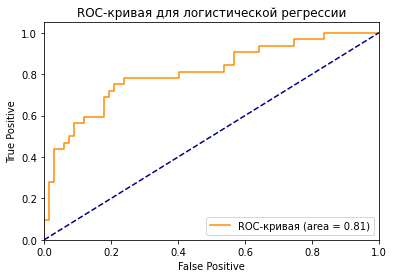

In [43]:
# Предсказания на основе x_test
probs = model_LR.predict_proba(x_test)

# Расчет ROC AUC, ROC-кривой
fpr_log, tpr_log, treshold= roc_curve(y_test, probs[:,1])
prob_auc = roc_auc_score(y_test, probs[:,1])
auc_pr_log = auc(fpr_log, tpr_log)
print(prob_auc)

# Вывод графика
plt.plot(fpr_log, tpr_log, color='darkorange', label='ROC-кривая (area = %0.2f)' % auc_pr_log)
plt.plot([0,1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC-кривая для логистической регрессии')
plt.legend(loc='lower right')
plt.show()

### Вывод

Таким образом, после завершения работы с алгоритмом логистической регрессии, было получено, что данный метод сильно превосходит по всем показателям *метод k-ближайших соседей*. Например, точность определения в данном методе составляет **87 %**, в то время как в предыдущем методе данный параметр при оптимальном значении кластеров **77 %**.           
Далее представлен список основных метрик, по которым будет производиться сравнение с другими параметрами:
- *precision* - для нуля: **0.89**, для единицы: **0.79**;
- *recall* - для нуля: **0.93**, для единицы: **0.70**;
- *f1-score* - для нуля: **0.91**, для единицы: **0.75**;
- *accuracy* - **0.87**;
- *AUC ROC* - **0.884**. 

[Вернуться в начало](#intro)

## Случайный лес <a id='4_3'></a>

*Случайный лес* (Random Forest, RF) - это алгоритм обучения с учителем. Данный алгоритм состоит из четырёх этапов:

1. Создание случайной выборки из заданного набора данных;
2. Для каждой выборки строится дерево решений и получается результат предсказаний, используя данное дерево;
3. Проведение голосования за каждый полученный прогноз;
4. Выбор предсказания с наибольшим количеством голосов в качестве окончательного результата.

### Импортирование компонентов и создание модели

Для начала работы с данной моделью, её необходимо импортировать в данный проект. Данный процесс показан ниже:

In [31]:
from sklearn.ensemble import RandomForestClassifier

Затем, необходимо создать экземпляр класса `RandomForestClassifier` и обозвать его переменной **model_RF**. Создание модели представлено ниже:

In [32]:
model_RF = RandomForestClassifier()

### Обучение модели и прогнозирование данных

Для обучения модели точно также, как и в предыдущем случае используется метод `.fit()`, который применяется к созданной переменной **model_RF**.

In [33]:
model_RF.fit(x_train, y_train)

RandomForestClassifier()

Способ получения прогнозов точно такой же, как и в предыдущем случае. Достаточно просто вызвать метод `.predict()`, передав в него переменную **x_test**

In [34]:
predictions_RF = model_RF.predict(x_test)

### Оценка точности

Оценка точности алгоритма будет проводиться по тем же самым критериям, как и в предыдущем случае, а именно:

1) **Доля правильных ответов** (*accuracy*)
2) **Точность** (*precision*)
3) **Полнота** (*recall*)
4) **F1-мера** (*F1-score*)
5) **Матрица ошибок** (*confusion matrix*)

Как и в предыдущем методе, первые четыре метрики выведем сразу в *отчете о классификации*, который представлен ниже:

In [35]:
print(classification_report(y_test, predictions_RF))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.81      0.66      0.72        32

    accuracy                           0.84        99
   macro avg       0.83      0.79      0.80        99
weighted avg       0.84      0.84      0.83        99



Далее, построим матрицу ошибок для данного метода. Вид получившейся матрицы представлен ниже:

In [36]:
cm = confusion_matrix(y_test, predictions_RF)
Tn, Fp, Fn, Tp = cm.ravel()
print(cm)
print(f'Tn = {Tn}', f'Fp = {Fp}', f'Fn = {Fn}', f'Tp = {Tp}', sep='\n')

[[62  5]
 [11 21]]
Tn = 62
Fp = 5
Fn = 11
Tp = 21


Как уже было выяснено ранее, у хорошей модели большая часть прогнозов должна попадать в группы `Tp` и `Tn`. Из выводимых значений видно, что **82** прогноза из 99 попали в данные две группы. Следовательно, созданная модель является не просто хорошей, а отличной.

И заключительным этапом построим график **ROC-кривой**. Данный график рассчитывается на долях *истинно положительных* и *ложно положительных* результатов. Вид данного графика представлен ниже:

0.9060167910447762


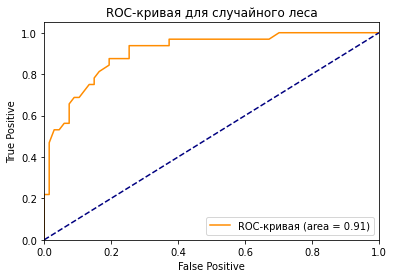

In [41]:
# Предсказания на основе x_test
probs = model_RF.predict_proba(x_test)

# Расчет ROC AUC, ROC-кривой
fpr_for, tpr_for, treshold= roc_curve(y_test, probs[:,1])
prob_auc = roc_auc_score(y_test, probs[:,1])
auc_pr_for = auc(fpr_for, tpr_for)
print(prob_auc)

# Вывод графика
plt.plot(fpr_for, tpr_for, color='darkorange', label='ROC-кривая (area = %0.2f)' % auc_pr_for)
plt.plot([0,1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC-кривая для случайного леса')
plt.legend(loc='lower right')
plt.show()

### Вывод

Таким образом, подводя итог по работе с данным алгоритмом, можно сделать вывод о том, что данный метод по своей точности примерно схож с предыдущим *алгоритмом линейной регрессии*. Если снова сравнивать эти два алгоритма по показателю точности определения, то в этом методе точно определения составляет **89 %**, в то время как в предыдущем немного меньше, **87 %**.              
Далее представлен список основных метрик, по которым будет производиться сравнение с другими параметрами:
- *precision* - для нуля: **0.94**, для единицы: **0.77**;
- *recall* - для нуля: **0.90**, для единицы: **0.85**;
- *f1-score* - для нуля: **0.92**, для единицы: **0.81**;
- *accuracy* - **0.89**;
- *AUC ROC* - **0.910**. 

[Вернуться в начало](#intro)

## Дополнительное задание <a id='dop'></a>

Дополнительное задание было создано из двух частей. **В первой части** необходимо графики ROC-кривых для всех трёх моделей изобразить на одной координатной плоскости. Выполнение данной части показано ниже:

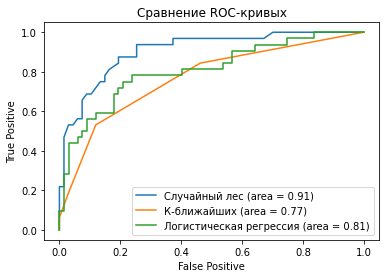

In [48]:
plt.plot(fpr_for, tpr_for, label='Случайный лес (area = %0.2f)' % auc_pr_for)
plt.plot(fpr_k_near, tpr_k_near, label='К-ближайших (area = %0.2f)' % auc_pr_k_near)
plt.plot(fpr_log, tpr_log, label='Логистическая регрессия (area = %0.2f)' % auc_pr_log)
plt.legend()
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('Сравнение ROC-кривых')
plt.show()

Из сравнения графиков видно, что наилучшей точностью классификации обладает модель *Случайный лес*, поскольку площадь под графиком у данного метода самая большая.

**Вторая часть** дополнительного задания заключается в том, чтобы посмотреть все возможные придаваемые параметры при создании модели *Случайного леса*.

Список параметров представлен ниже:
1) **n_estimators** - количество деревьев в *лесу*;
2) **criterion** - функция измерения качества разделения;
3) **max_depth** - максимальная глубина дерева;
4) **min_samples_split** - минимальное количество выборок, необходимое для разделения внутреннего узла;
5) **min_samples_leaf** - минимальное количество выборок, необходимое для конечного узла;
6) **min_weight_fraction_leaf** - минимальная взвешенная доля суммы весов (всех входных выборок), которая должна находиться в листовом узле;
7) **max_features** - ряд особенностей, которые следует учитывать при поиске лучшего сплита;
8) **max_leaf_nodes** - выращивайте деревья в лучшем порядке. Лучшие узлы определяются как относительное уменьшение примеси;
9) **min_impurity_decrease** - узел будет разделен, если это разделение приведет к уменьшению примеси, большему или равному этому значению;
10) **bootstrap** - используются ли образцы начальной загрузки при построении деревьев;
11) **oob_score** - следует ли использовать готовые образцы для оценки оценки обобщения;
12) **n_jobs** - количество заданий для параллельного выполнения;
13) **random_state** - управляет как случайностью начальной загрузки выборок, используемых при построении деревьев (если bootstrap=True), так и выборкой признаков, которые следует учитывать при поиске наилучшего разделения в каждом узле;
14) **max_samples** - eсли **bootstrap** имеет значение True, количество выборок, которые нужно извлечь из X для обучения каждой базовой оценки.

## Выводы <a id='5'></a>

В ходе выполнения данной лабораторной работы я улучшил свои навыки работы с Jupiter-блокнотами. Вновь осуществил предварительную обработку данных, а также вспомнил этапы работы с библиотекой **Pandas**.

Кроме этого, в данной лабораторной работе я впервые ознакомился с тремя методами классификации, а именно: **метод к-ближайших соседей**, **алгоритм логистической регрессии** и **алгоритм случайного леса**. Все эти методы предназначены для классифицирования данных по двум классам, что как раз и нужно, поскольку в исходном датасете, в целевом признаке присутствует лишь два значения: либо **0**, либо **1**.

Если делать небольшие выводы по каждому из данных методов, то про **метод к-ближайших соседей** можно сказать, что данный метод является одним из самых популярных среди ML-моделей для решения задач классификации, поскольку логика его работы понятна даже школьнику. **Алгоритм логистической регрессии** является уже не таким простым, в отличии от предыдущего, но при этом, он получается гораздо точнее. А **алгоритм случайного леса** считается высокоточным и надёжным методом, поскольку в процессе прогнозирования участвует множество деревьев решений. Также, последний метод может использоваться как для задач классификации, так и для задач регрессии.

Далее, рассмотрим ход выполнения лабораторной работы поэтапно.

В начале, на этапе **предварительной обработки данных** было получено, что в исходном наборе данных отсутствуют какие-либо искажения в данных, т.е. не было ни пропусков, ни явных дубликатов, ни неявных дубликатов. Единственный обнаруженный недостаток заключался в том, что название последнего столбца, который хранил в себе информацию о том, умер ли пациент в течении периода наблюдения или нет, было написано в верхнем регистре. Данная ошибка была исправлена и на этом этап обработки был завершён.

Затем, на этапе **выявление целевого признака** в исходном датасете был обнаружен целевой столбец (т.е. тот столбец, который будет рассматриваться в качестве ответов для дальнейшей работы). Так столбцом являлся все тот же столбец `death_event`.

Далее, на этапе **разбиение данных** исходный датасет был разбит 2 раза. В первый раз, из исходного датасета был изъят столбец `death_event`, то есть произошло разделение на зависимую и независимые переменные. Во второй раз, разбитые датасеты были разбиты на части: *тренировочную* и *тестовую*. Тренировочная часть понадобиться в дальнейшем для обучения алгоритмов, а тестовая - для проверки способности прогнозирования.

И далее, на этапе **разработка моделей** как раз и были разработаны все три описанные выше модели. Разработка любой модели происходит в 4 этапа:
- Импортирование компонентов;
- Создание модели;
- Обучение модели;
- Прогнозирование данных на основе модели;

После выполнения данных этапов происходила *Оценка точности* разработанной модели. В ходе данной оценки разработанная модель проверялась несколькими разными метриками. Так, например, набор метрик для **4-ех кластеров** метода к-ближайших соседей выглядит следующим образом:
- *precision* - для нуля: **0.78**, для единицы: **0.70**;
- *recall* - для нуля: **0.96**, для единицы: **0.26**;
- *f1-score* - для нуля: **0.86**, для единицы: **0.38**;
- *accuracy* - **0.77**;
- *AUC ROC* - **0.756**.

Точно такие же наборы метрик созданы и для двух других методов. Сравнив метрики у данных методов, можно сделать вывод о том, что **алгоритм случайного леса** является самым точным по всем метрикам в рамках задачи кластеризации, а **метод к-ближайших соседей** - самым неточным.